# acquire & summarize

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from acquire import get_connection, get_zillow_data

import warnings
warnings.filterwarnings("ignore")

1. Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.

    - Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.
    - Only include properties with a transaction in 2017, and include only the last transaction for each properity (so no duplicate property ID's), along with zestimate error and date of transaction.
    - Only include properties that include a latitude and longitude value.

In [93]:
df = get_zillow_data()

2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [6]:
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,buildingclasstypeid.1,buildingclassdesc,heatingorsystemtypeid.1,heatingorsystemdesc,propertylandusetypeid.1,propertylandusedesc,storytypeid.1,storydesc,typeconstructiontypeid.1,typeconstructiondesc
0,2593270,10713762,NaN,NaN,NaN,1.0,3.0,NaN,3.0,1.0,...,3.0,Buildings having exterior walls built of a non...,NaN,NaN,261,Single Family Residential,NaN,NaN,NaN,NaN
1,1714066,10713611,NaN,NaN,NaN,1.0,1.0,NaN,4.0,1.0,...,4.0,Buildings having wood or wood and steel frames,7.0,Floor/Wall,261,Single Family Residential,NaN,NaN,NaN,NaN
2,2012153,10713692,NaN,NaN,NaN,3.0,4.0,NaN,4.0,3.0,...,4.0,Buildings having wood or wood and steel frames,2.0,Central,261,Single Family Residential,NaN,NaN,NaN,NaN
3,1477688,10717722,NaN,NaN,NaN,2.0,3.0,NaN,4.0,2.0,...,4.0,Buildings having wood or wood and steel frames,7.0,Floor/Wall,261,Single Family Residential,NaN,NaN,NaN,NaN
4,1000528,10720207,NaN,NaN,NaN,1.0,2.0,NaN,4.0,1.0,...,4.0,Buildings having wood or wood and steel frames,7.0,Floor/Wall,261,Single Family Residential,NaN,NaN,NaN,NaN


dropping duplicate columns

In [7]:
df = df.drop(df.columns[[59, 62, 64, 66, 68, 70, 72, 74]], axis = 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77575 entries, 0 to 77574
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77575 non-null  int64  
 1   parcelid                      77575 non-null  int64  
 2   airconditioningtypeid         25006 non-null  float64
 3   architecturalstyletypeid      206 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   77575 non-null  float64
 6   bedroomcnt                    77575 non-null  float64
 7   buildingclasstypeid           15 non-null     float64
 8   buildingqualitytypeid         49809 non-null  float64
 9   calculatedbathnbr             76960 non-null  float64
 10  decktypeid                    614 non-null    float64
 11  finishedfloor1squarefeet      6035 non-null   float64
 12  calculatedfinishedsquarefeet  77375 non-null  float64
 13  f

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,77575.0,1.495352e+06,8.609703e+05,3.490000e+02,7.521050e+05,1.498195e+06,2.240715e+06,2.982274e+06
parcelid,77575.0,1.300630e+07,3.478021e+06,1.071186e+07,1.153820e+07,1.253053e+07,1.421124e+07,1.676893e+08
airconditioningtypeid,25006.0,1.812045e+00,2.965823e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
architecturalstyletypeid,206.0,7.388350e+00,2.734542e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
basementsqft,50.0,6.797200e+02,6.897035e+02,3.800000e+01,2.730000e+02,5.150000e+02,7.965000e+02,3.560000e+03
bathroomcnt,77575.0,2.298518e+00,9.966998e-01,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
bedroomcnt,77575.0,3.053252e+00,1.140440e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
buildingclasstypeid,15.0,3.933333e+00,2.581989e-01,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
buildingqualitytypeid,49809.0,6.533779e+00,1.722062e+00,1.000000e+00,6.000000e+00,6.000000e+00,8.000000e+00,1.200000e+01
calculatedbathnbr,76960.0,2.316385e+00,9.796845e-01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01


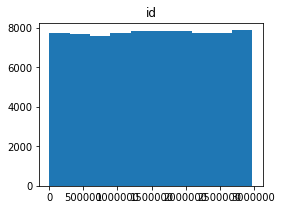

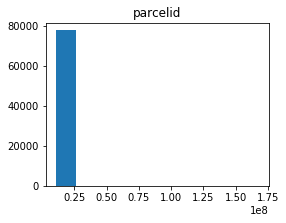

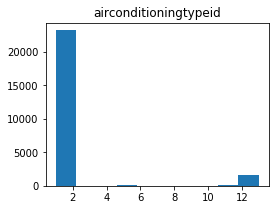

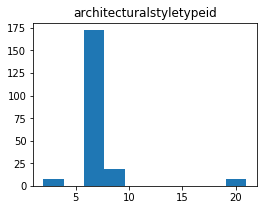

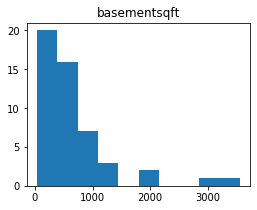

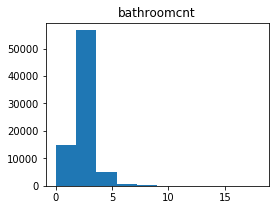

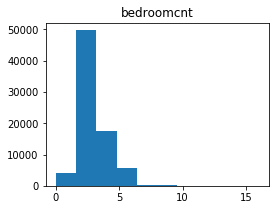

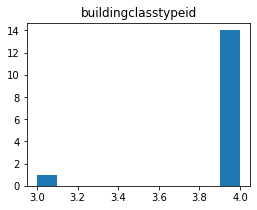

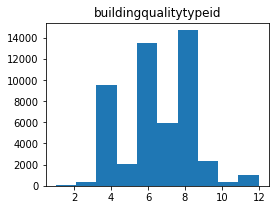

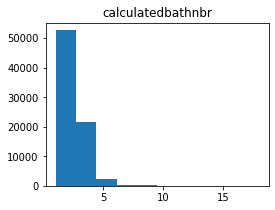

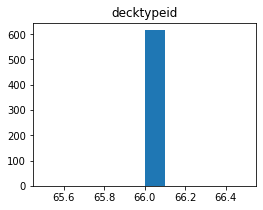

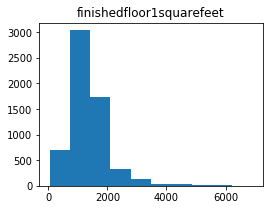

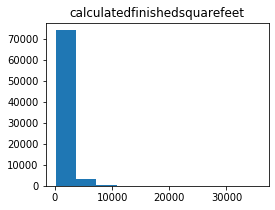

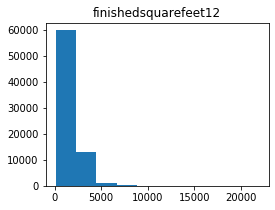

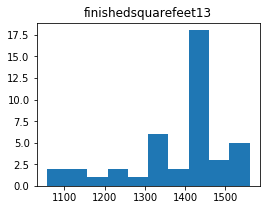

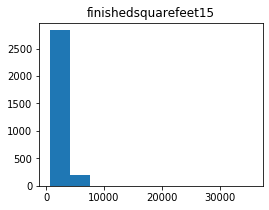

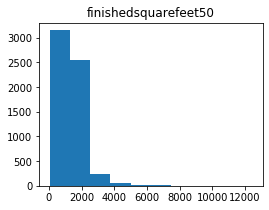

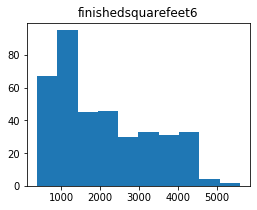

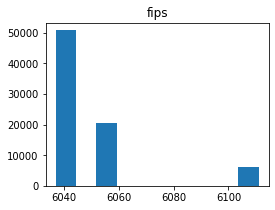

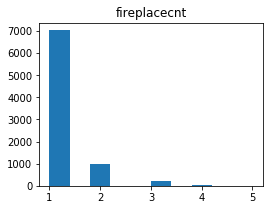

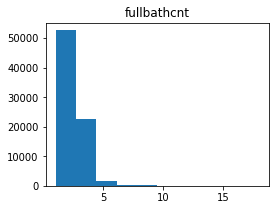

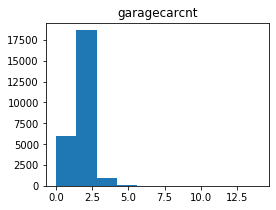

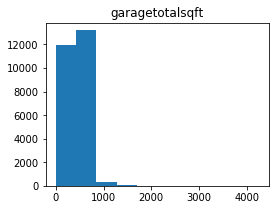

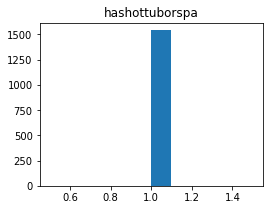

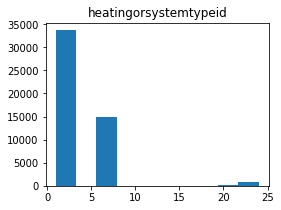

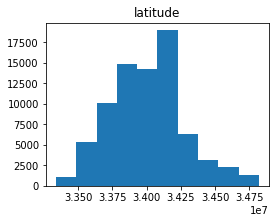

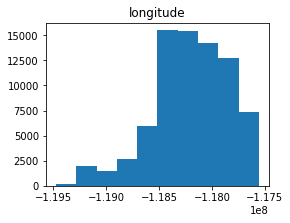

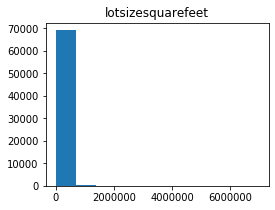

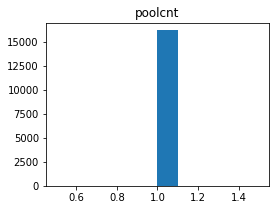

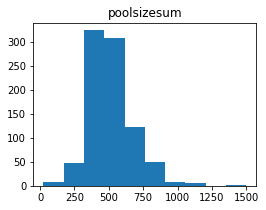

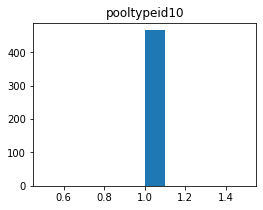

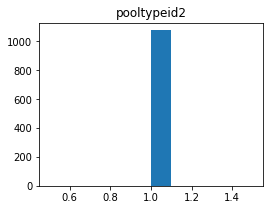

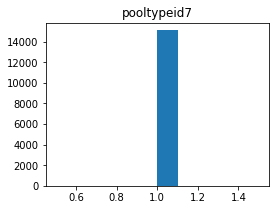

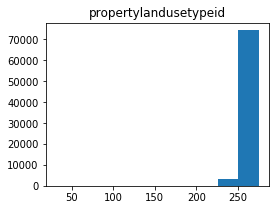

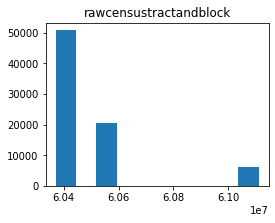

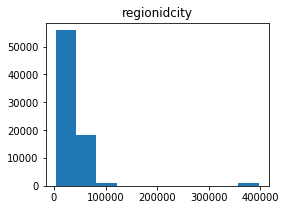

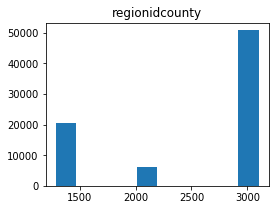

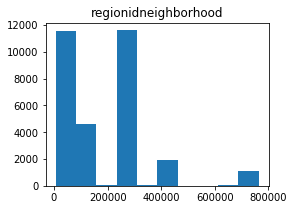

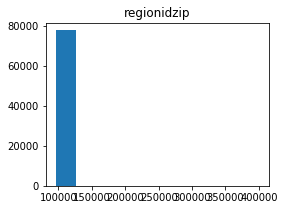

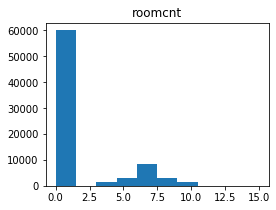

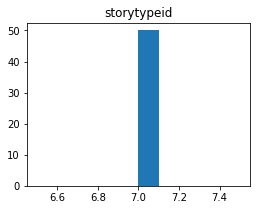

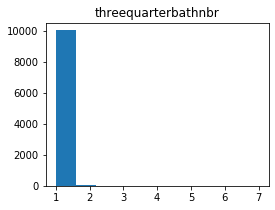

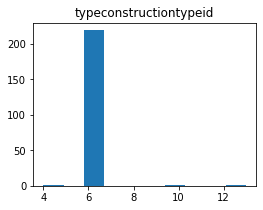

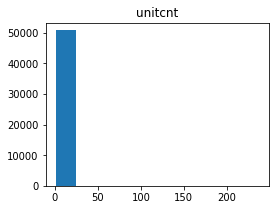

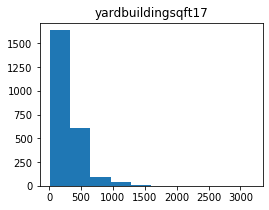

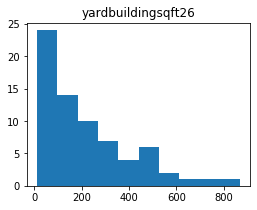

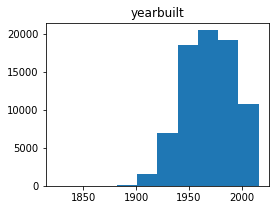

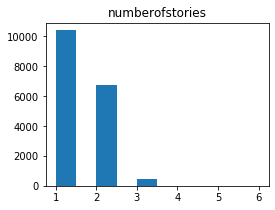

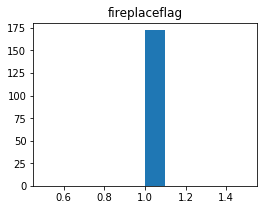

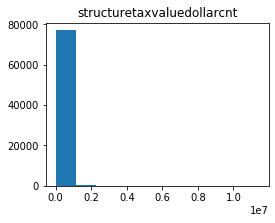

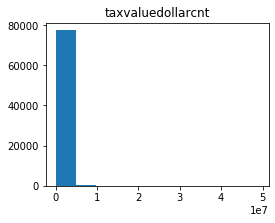

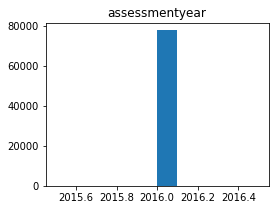

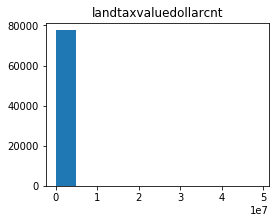

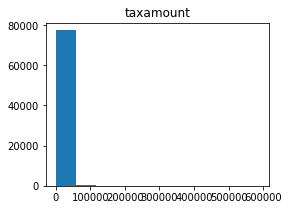

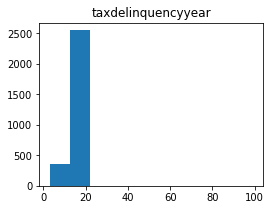

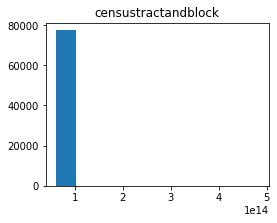

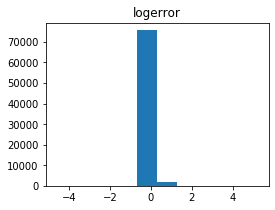

In [7]:
for col in df.columns:
    if df[col].dtype != object:
        plt.figure(figsize=(4,3))
        plt.hist(df[col])
        plt.title(col)
        plt.show()

In [8]:
for col in df.columns:
    print("\n")
    print(df[col].value_counts())
    print("\n")



709378     3
1968735    3
2061546    2
1416119    2
2964522    2
          ..
819298     1
650455     1
2852058    1
373980     1
2232322    1
Name: id, Length: 77381, dtype: int64




12612211    3
11991059    3
12541155    2
12941764    2
11420117    2
           ..
11514972    1
10861661    1
17131320    1
11687008    1
14298875    1
Name: parcelid, Length: 77381, dtype: int64




1.0     23185
13.0     1575
5.0       167
11.0       53
9.0        26
Name: airconditioningtypeid, dtype: int64




7.0     172
8.0      19
21.0      7
2.0       5
3.0       3
Name: architecturalstyletypeid, dtype: int64




700.0     2
515.0     2
900.0     2
912.0     2
640.0     2
273.0     2
100.0     2
3560.0    1
396.0     1
204.0     1
405.0     1
674.0     1
669.0     1
394.0     1
380.0     1
819.0     1
786.0     1
3112.0    1
1809.0    1
645.0     1
512.0     1
224.0     1
168.0     1
254.0     1
352.0     1
280.0     1
314.0     1
1252.0    1
112.0     1
252.0     1
126.0     1
200.0     1
30

Name: taxdelinquencyflag, dtype: int64




15.0    1560
14.0     801
13.0     187
12.0     113
11.0      98
10.0      66
9.0       47
8.0       14
7.0       10
6.0        1
3.0        1
4.0        1
99.0       1
Name: taxdelinquencyyear, dtype: int64




6.037137e+13    60
6.037277e+13    51
6.059032e+13    44
6.037920e+13    41
6.059063e+13    41
                ..
6.037800e+13     1
6.059042e+13     1
6.037574e+13     1
6.037406e+13     1
6.037911e+13     1
Name: censustractandblock, Length: 39006, dtype: int64




 0.000231    7
 0.002652    7
 0.011157    5
 0.001878    5
 0.000420    5
            ..
 0.063310    1
-0.136595    1
-0.018962    1
-0.036124    1
 0.010783    1
Name: logerror, Length: 77030, dtype: int64




2017-06-30    1194
2017-04-28     917
2017-05-31     868
2017-07-28     815
2017-08-31     782
              ... 
2017-02-18       1
2017-09-10       1
2017-07-22       1
2017-05-20       1
2018-05-25       1
Name: lasttransactiondate, Length: 265, dtype: int64




3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [36]:
def null_finder_columns(df):
    '''
    This function takes in a DataFrame and list 
    information about the null values in the columns
    '''
    #accepts a 'df' and creates a new one labeled 'nulls'  
    #nulls index is the df's columns
    nullsGilbert = pd.DataFrame(index = df.columns)
    #sums up the null values in the dataframes columns
    nulls['num_rows_missing'] = df.isnull().sum(axis = 0)
    #finds the percentage of null values in the df's columns
    nulls['pct_rows_missing'] = nulls.num_rows_missing / df.shape[0]
    return nulls

In [37]:
columns = null_finder_columns(df)

In [38]:
columns[columns.pct_rows_missing > .50].shape

(34, 2)

Takeaways: 
- There are 34 out of the 68 columns missing more than half the value
- May need to drop a lot of the data

4. Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [171]:
rows = pd.DataFrame()

In [194]:
rows = pd.DataFrame()
rows['num_cols_missing'] = df.isnull().sum(axis=1)

In [195]:
rows['pct_cols_missing'] = df.isnull().sum(axis=1) / df.shape[1]

In [204]:
num_rows = rows.groupby('num_cols_missing').count()

In [205]:
num_rows

,pct_cols_missing
num_cols_missing,
25,2
26,11
27,21
28,39
29,43
30,37
31,261
32,219
33,4987


In [213]:
pct_cols = rows.groupby('num_cols_missing').mean()

In [214]:
pct_cols

,pct_cols_missing
num_cols_missing,
25,0.328947
26,0.342105
27,0.355263
28,0.368421
29,0.381579
30,0.394737
31,0.407895
32,0.421053
33,0.434211


In [223]:
nulls = pd.DataFrame({'num_cols_missing': num_rows.index,
                                             'pct_cols_missing': pct_cols,
                                             'num_rows': num_rows})

ValueError: Shape of passed values is (1, 3), indices imply (30, 3)

In [41]:
def nulls_finder_rows(df):
    nulls = pd.DataFrame()
    nulls['num_cols_missing'] = df.isnull().sum(axis=1)
    nulls['pct_cols_missing'] = df.isnull().sum(axis=1) / df.shape[1]
    return nulls

In [42]:
rows = nulls_finder_rows(df)

In [45]:
rows

,num_cols_missing,pct_cols_missing
0,34,0.500000
1,34,0.500000
2,34,0.500000
3,30,0.441176
4,32,0.470588
...,...,...
77570,38,0.558824
77571,48,0.705882
77572,47,0.691176
77573,48,0.705882


Takeaways:
- There are on average 32 columns with missing values in each rows

# Prepare

1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

    - The input:
        - A dataframe
        - A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
        - A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
    - The output:
        - The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.
    - hint:
        - Look up the dropna documentation.
        - You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.
        - Make use of inplace, i.e. inplace=True/False.

3. Decide how to handle the remaining missing values:

    - Fill with constant value.
    - Impute with mean, median, mode.
    - Drop row/column